In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch

df = pd.read_csv('EastWestAirlines.csv')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
df['Qual_miles'].value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [5]:
df_num = df.drop(['ID#', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?'], axis = 1)
df_num.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


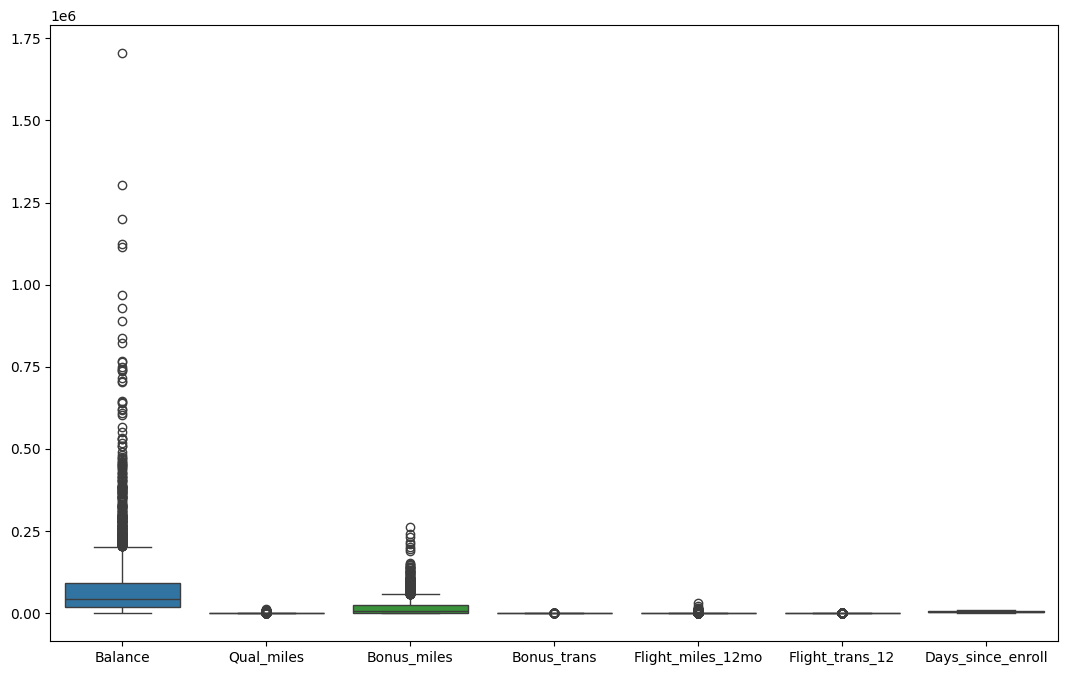

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 8))
sns.boxplot(data = df_num)
plt.show()

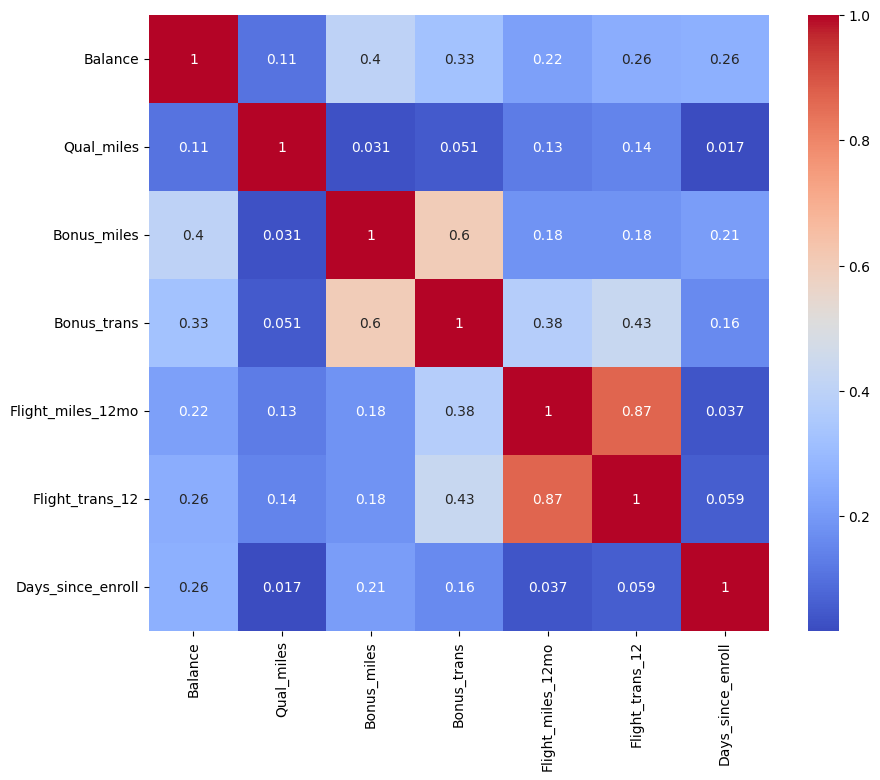

In [7]:
# Visualize correlations on Heat map
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_num.corr().round(3)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap = 'coolwarm')  # Visualize correlations as heatmap
plt.show()

<Figure size 1500x1000 with 0 Axes>

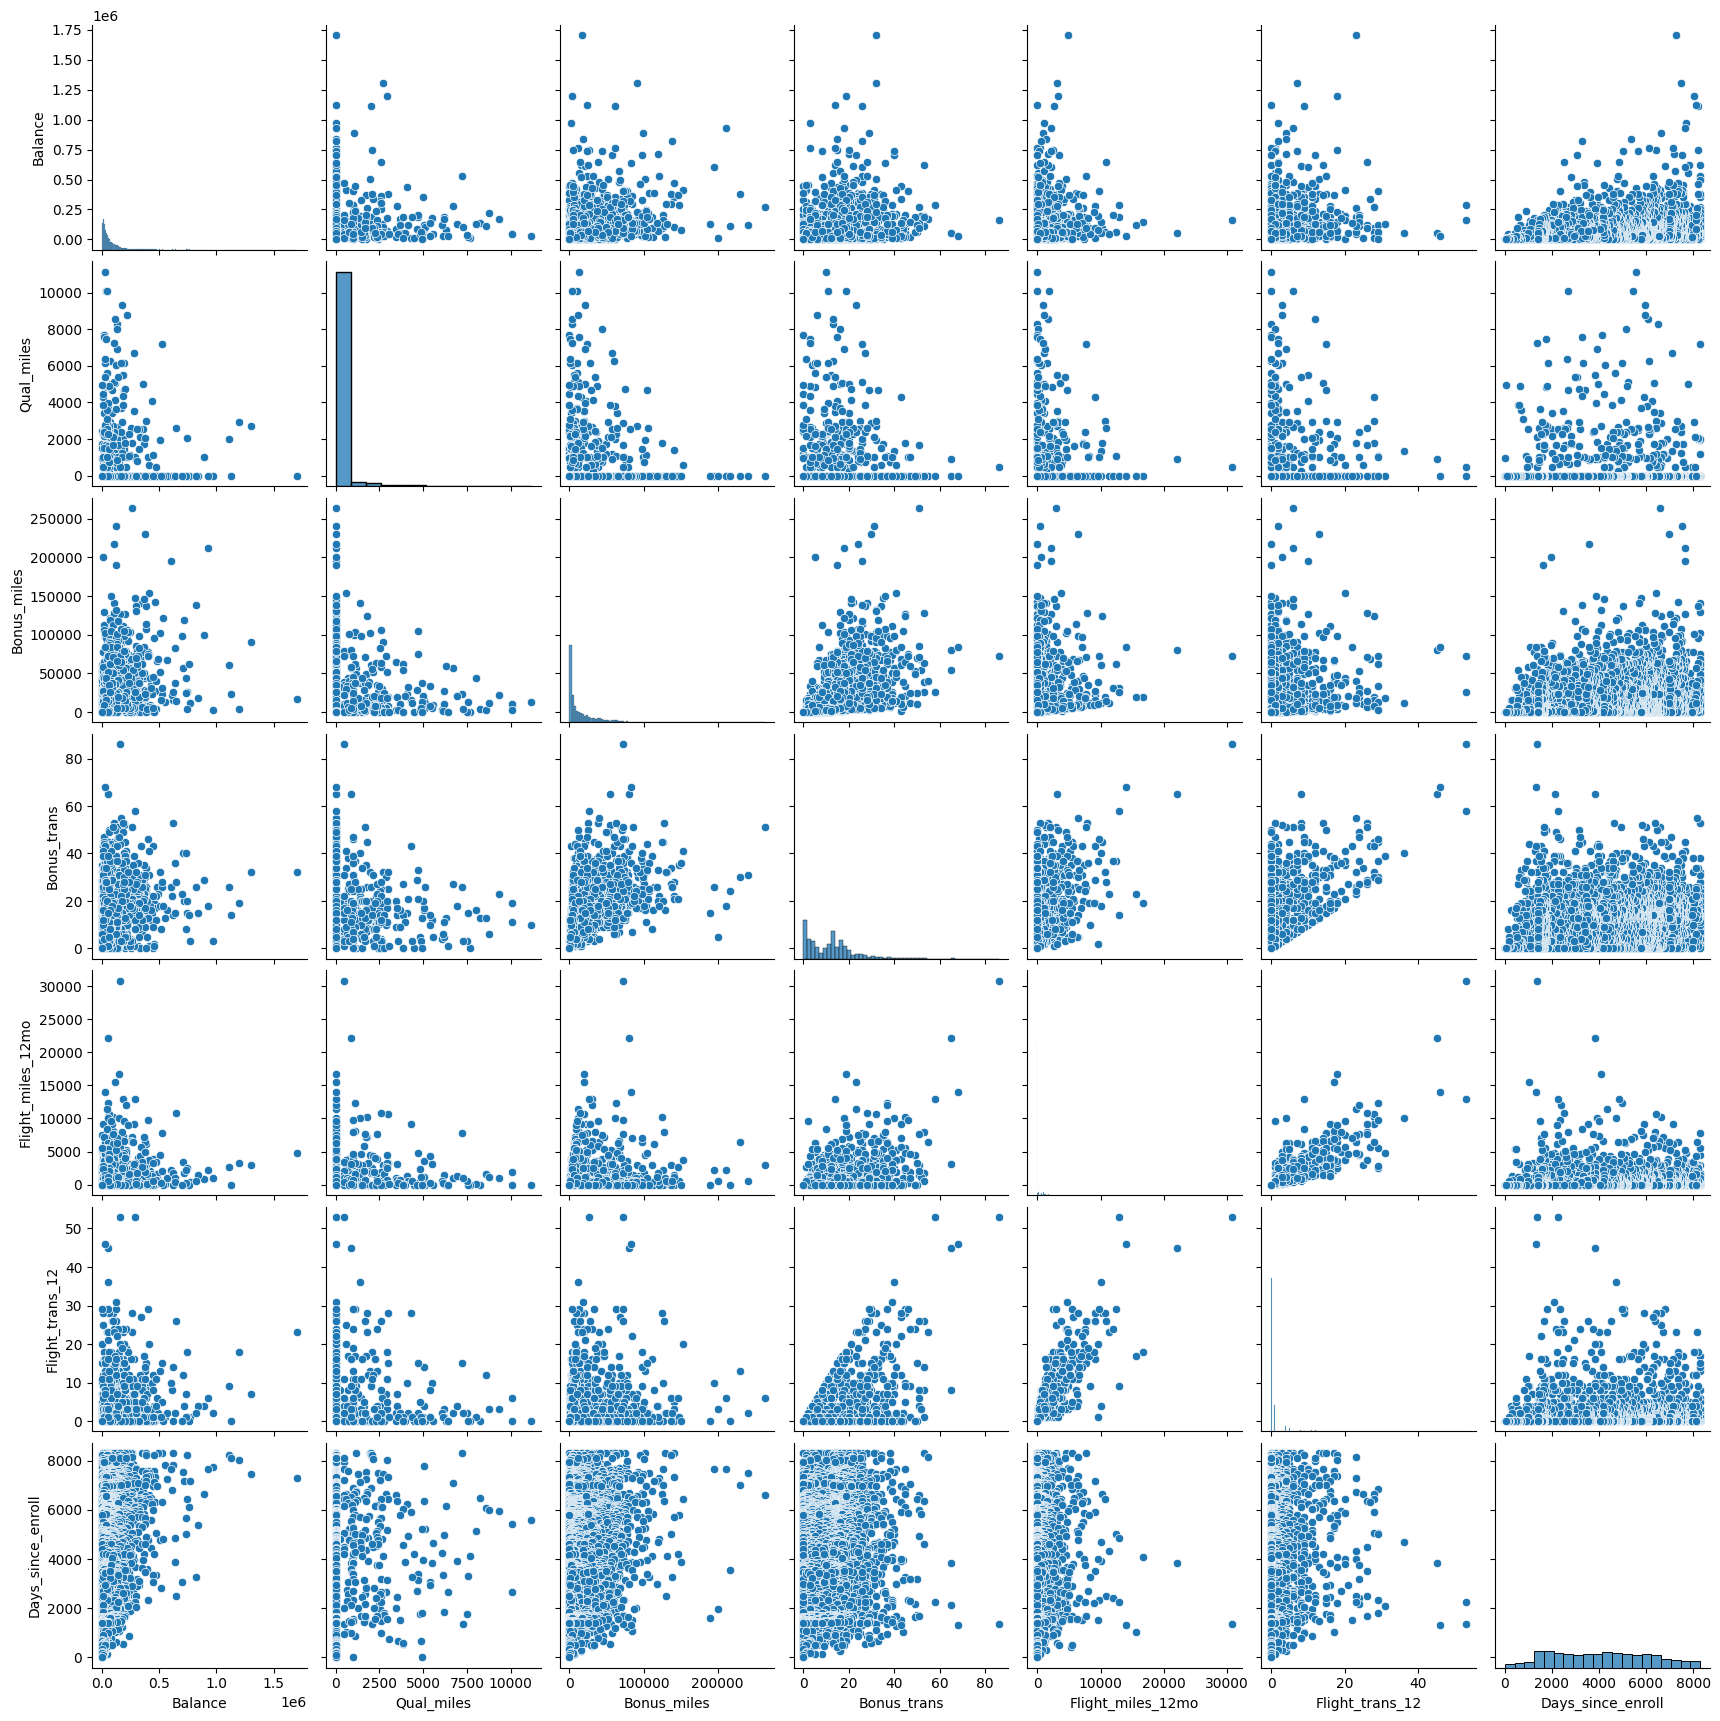

In [8]:
plt.figure(figsize = (15, 10))
sns.pairplot(df_num)
plt.show()

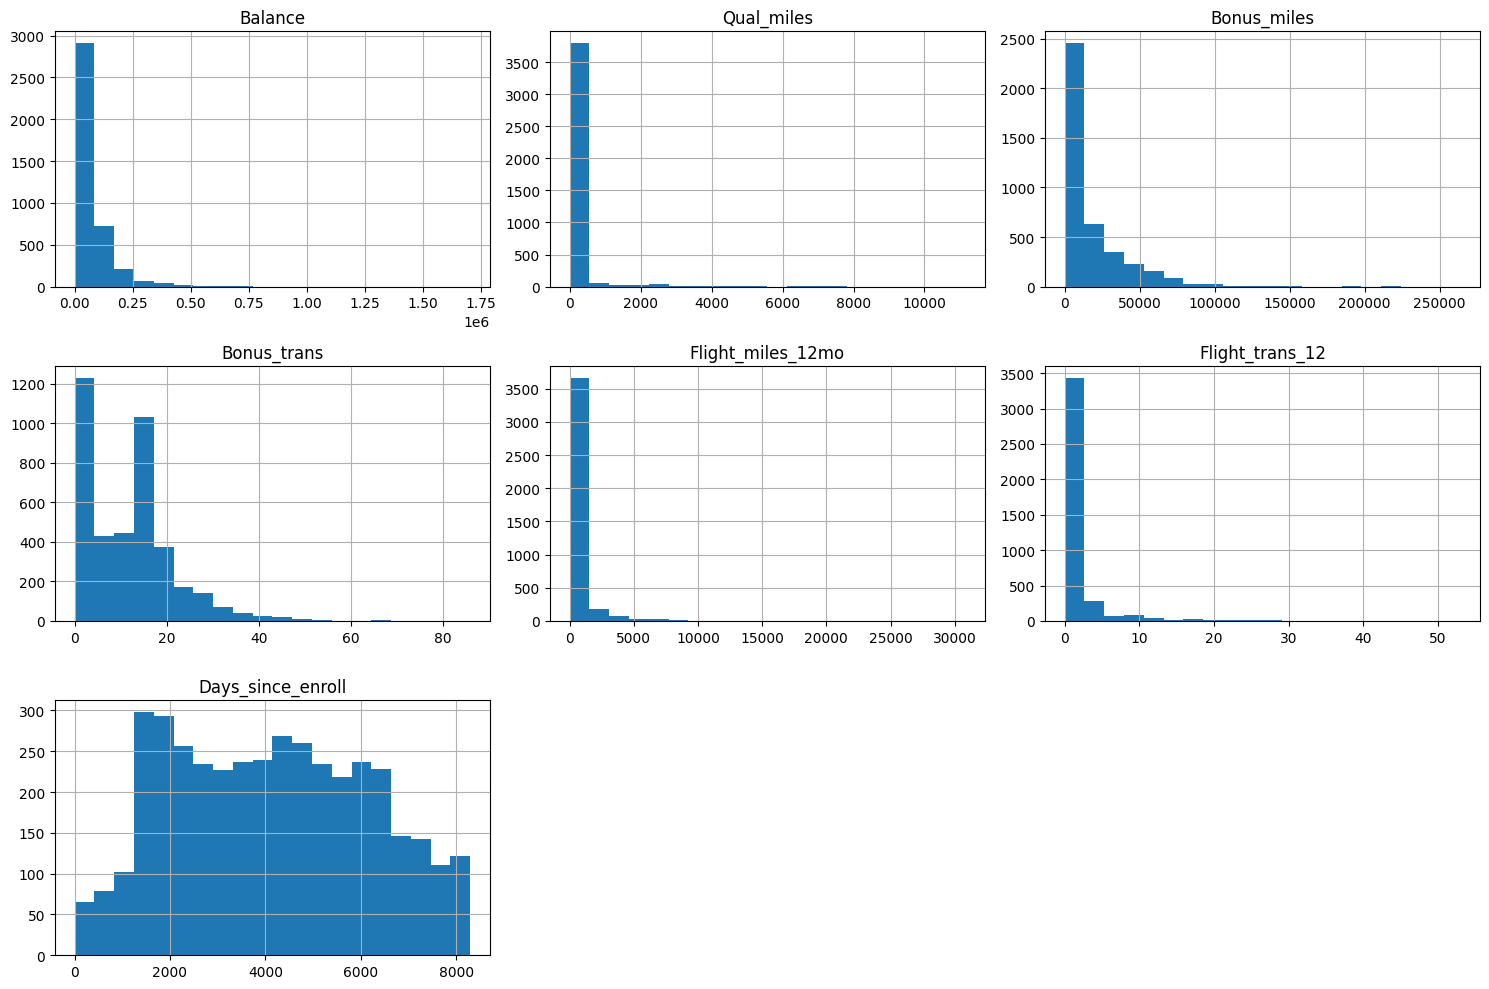

In [9]:
df_num.hist(figsize=(15, 10), bins=20, layout=(3, 3))

plt.tight_layout()
plt.show()

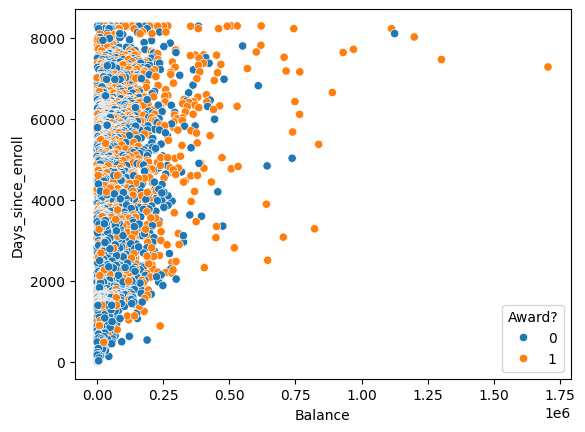

In [10]:
import seaborn as sns
sns.scatterplot(data=df, x='Balance', y='Days_since_enroll', hue='Award?')
plt.show()

### Data Transformation

In [11]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()

for i in df_num.columns:
    df_num[i] = MM.fit_transform(df_num[[i]])

df_num.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [12]:
df_cat = df[['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?']]
df_cat.head()

,cc1_miles,cc2_miles,cc3_miles,Award?
0,1,1,1,0
1,1,1,1,0
2,1,1,1,0
3,1,1,1,0
4,4,1,1,1


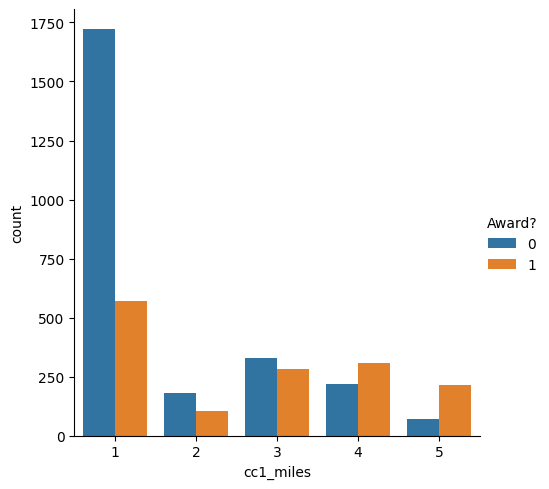

In [13]:
sns.catplot(x ="cc1_miles", hue ="Award?",  
kind ="count", data = df_cat)

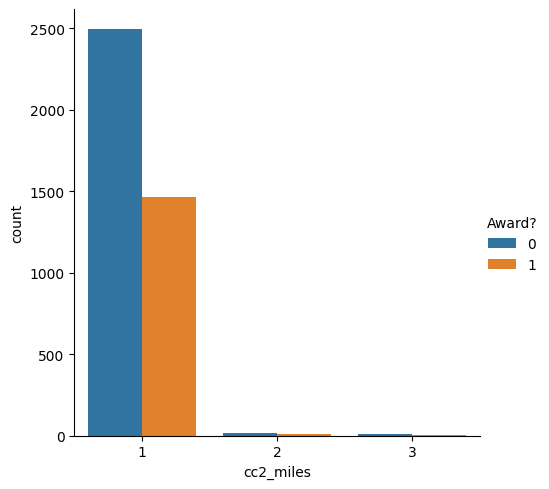

In [14]:
sns.catplot(x ="cc2_miles", hue ="Award?",  
kind ="count", data = df_cat)

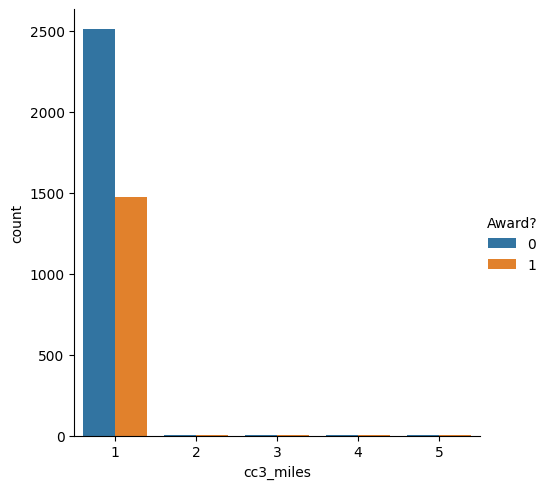

In [15]:
sns.catplot(x ="cc3_miles", hue ="Award?",  
kind ="count", data = df_cat)

In [16]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder # type: ignore
le = LabelEncoder()

for i in df_cat.columns: # type: ignore
    df_cat[i] = le.fit_transform(df_cat[[i]]) # type: ignore
df_cat.head()

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cs833\AppData\Local\Temp\ipykernel_18956\2100066420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i] = le.fit_transform(df_cat[[i]]) # type: ignore
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users

,cc1_miles,cc2_miles,cc3_miles,Award?
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,3,0,0,1


#### Agglomerative Clustering

1. Single Linkage Method

In [17]:
# Clustering

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, linkage = 'single')
df_num['Agg_cluster'] = cluster.fit_predict(df_num)
df_num

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Agg_cluster
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0
...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,0
3995,0.037766,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,0
3996,0.043169,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,0
3997,0.032202,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0


In [18]:
df_num['Agg_cluster'].value_counts()

Agg_cluster
0    3993
2       2
3       1
5       1
4       1
1       1
Name: count, dtype: int64

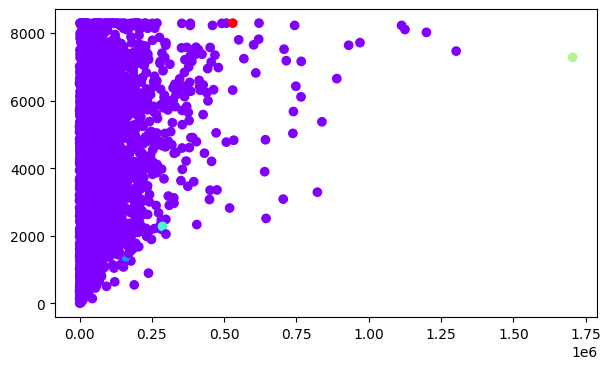

In [19]:
plt.figure(figsize = (7, 4))
plt.scatter(df['Balance'], df['Days_since_enroll'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

In [20]:
# Metrics - Silhouette score
Y = df_num[['Agg_cluster']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(df_num.iloc[:, 1:-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette score for complete linkage: 0.4069


2. Complete Linkage Method

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette score for complete linkage: 0.3588


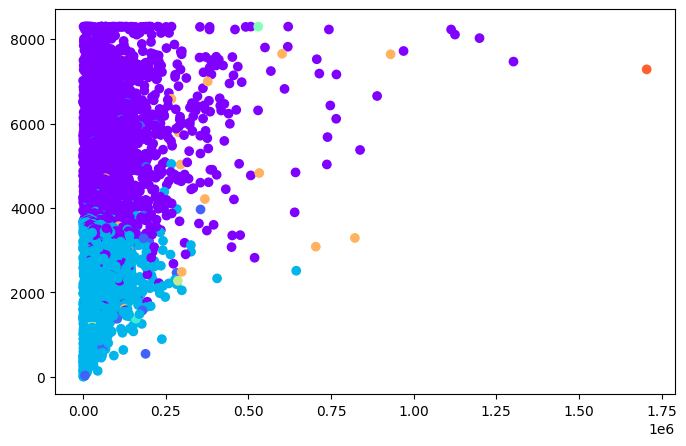

In [21]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=9, linkage = 'complete')
df_num['Agg_cluster'] = cluster.fit_predict(df_num)

Y = df_num[['Agg_cluster']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(df_num.iloc[:, 1:-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

plt.figure(figsize = (8, 5))
plt.scatter(df['Balance'], df['Days_since_enroll'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

3. Average Linkage Method

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette score for complete linkage: 0.3588


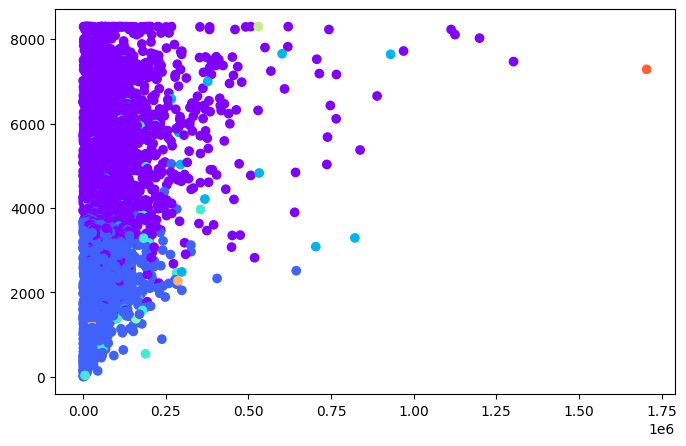

In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=9, linkage = 'average')
df_num['Agg_cluster'] = cluster.fit_predict(df_num)

Y = df_num[['Agg_cluster']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(df_num.iloc[:, 1:-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

plt.figure(figsize = (8, 5))
plt.scatter(df['Balance'], df['Days_since_enroll'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

4. Ward Linkage Method

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette score for complete linkage: 0.2243


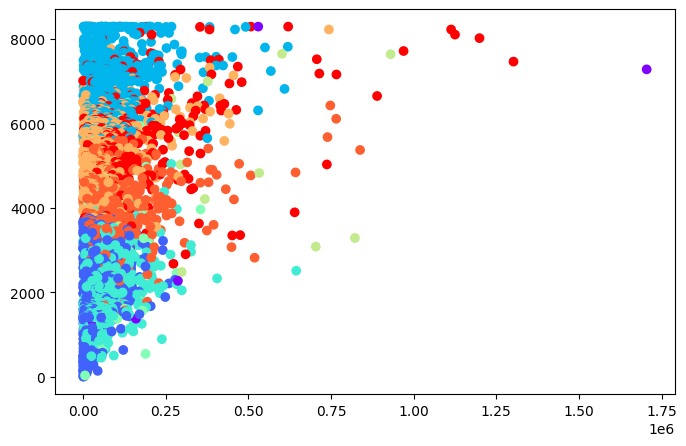

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=9, linkage = 'ward')
df_num['Agg_cluster'] = cluster.fit_predict(df_num)

Y = df_num[['Agg_cluster']]

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(df_num.iloc[:, 1:-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

plt.figure(figsize = (8, 5))
plt.scatter(df['Balance'], df['Days_since_enroll'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

#### Finding the best cluster formation

1. Single linkage

Silhouette scores: [0.6939515197491796, 0.631839817452602, 0.5899746340351645, 0.5885272353816335, 0.5876848600196318, 0.5010852981783472, 0.5009741725062619, 0.45278044600847234]


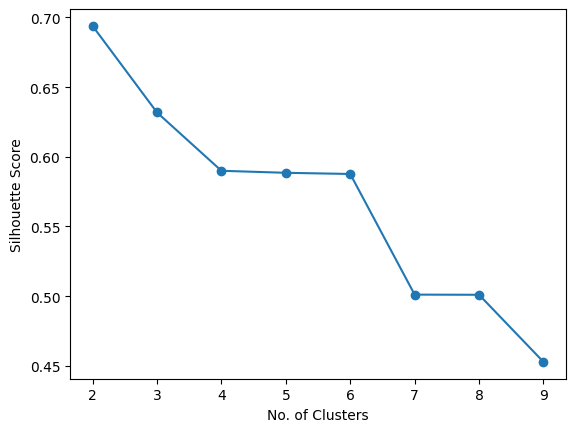

In [24]:
scores = []

for i in range(2, 10):
    cluster = AgglomerativeClustering(n_clusters = i,linkage = 'single')
    df_num["Agg_cluster"] = cluster.fit_predict(df_num)
    Y = df_num['Agg_cluster']
    scores.append(silhouette_score(df_num.iloc[:, :-1],Y))

print('Silhouette scores:', [float(score) for score in scores])
plt.scatter(range(2, 10), scores)
plt.plot(range(2, 10), scores)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

2. Complete Linkage

In [25]:
df_num.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Agg_cluster
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0


In [26]:
df_num.iloc[:, :-1]

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


Silhouette scores: [0.7001789403869958, 0.4261698263641925, 0.41318266350678023, 0.37353268524484906, 0.3523464525499962, 0.35079869174753836, 0.2962114016593044, 0.29584163412161035]


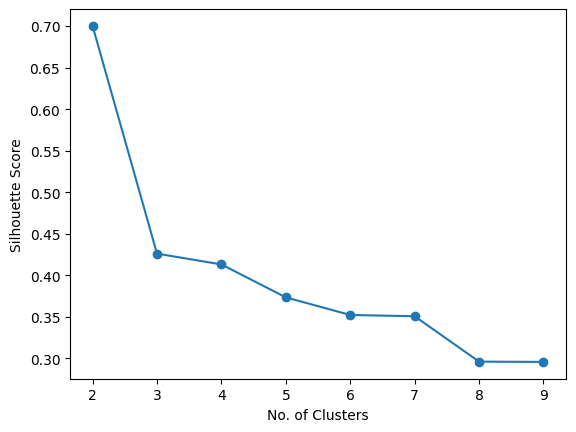

In [27]:
scores = []

for i in range(2, 10):
    cluster = AgglomerativeClustering(n_clusters = i,linkage = 'complete')
    df_num["Agg_cluster"] = cluster.fit_predict(df_num)
    Y = df_num['Agg_cluster']
    scores.append(silhouette_score(df_num.iloc[:, :-1],Y))

print('Silhouette scores:', [float(score) for score in scores])
plt.scatter(range(2, 10), scores)
plt.plot(range(2, 10), scores)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

3. Average Linkage

Silhouette scores: [0.038821609318576124, 0.037408267789748394, 0.035737301080821994, 0.044099987335165174, 0.04767506114450821, 0.0545023423418804, 0.053469119739240345, 0.05184802176244501]


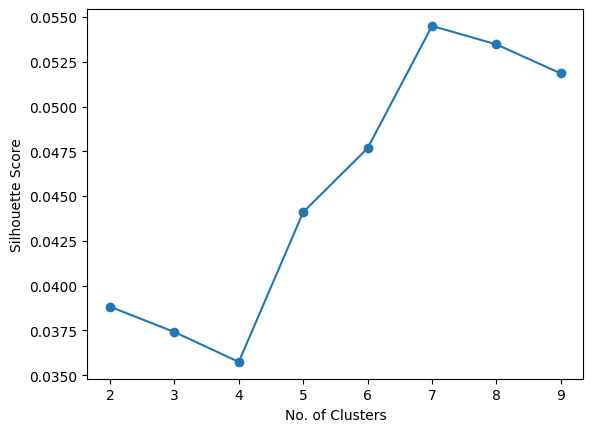

In [28]:
scores = []

for i in range(2, 10):
    cluster = AgglomerativeClustering(n_clusters = i,linkage = 'average')
    df_num["Agg_cluster"] = cluster.fit_predict(df_num)
    Y = df_num['Agg_cluster']
    scores.append(silhouette_score(df_num.iloc[:, :-1],Y))

print('Silhouette scores:', [float(score) for score in scores])
plt.scatter(range(2, 10), scores)
plt.plot(range(2, 10), scores)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

4. Ward Linkage

Silhouette scores: [0.04205417652469052, 0.28169305967102154, 0.28568067211323694, 0.28909199420803355, 0.2209549442643007, 0.23063831539062435, 0.22697097257461046, 0.21458663318575924]


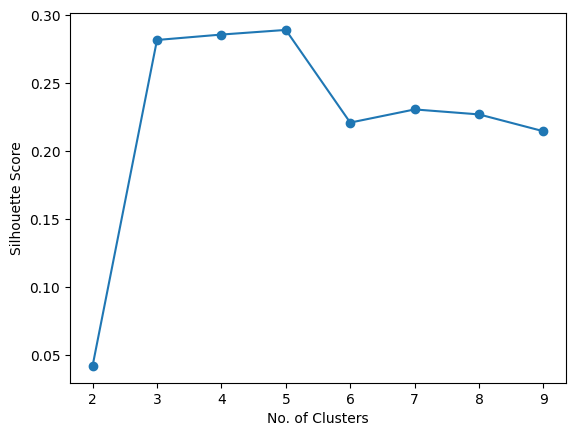

In [29]:
scores = []

for i in range(2, 10):
    cluster = AgglomerativeClustering(n_clusters = i,linkage = 'ward')
    df_num["Agg_cluster"] = cluster.fit_predict(df_num)
    Y = df_num['Agg_cluster']
    scores.append(silhouette_score(df_num.iloc[:, :-1],Y))

print('Silhouette scores:', [float(score) for score in scores])
plt.scatter(range(2, 10), scores)
plt.plot(range(2, 10), scores)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

As we observed that, Silhouette score for the complete linkage method is high for 2 cluster formation.

##### Finalized Cluster formation

Silhouette score for complete linkage: 0.2913


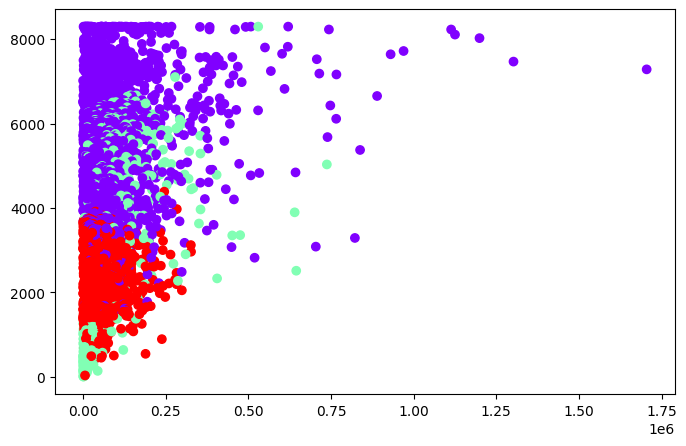

In [30]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3,linkage = 'ward')
df_num["Agg_cluster"] = cluster.fit_predict(df_num)
Y = df_num['Agg_cluster']

from sklearn.metrics import silhouette_score

sc1 = silhouette_score(df_num.iloc[:, 1:-1], Y)
print('Silhouette score for complete linkage:', sc1.round(4))

plt.figure(figsize = (8, 5))
plt.scatter(df['Balance'], df['Days_since_enroll'], c = cluster.labels_, cmap = 'rainbow')
plt.show()

In [31]:
df_num['Agg_cluster'].value_counts()

Agg_cluster
0    2181
2    1377
1     441
Name: count, dtype: int64

In [32]:
df_num.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Agg_cluster
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0


In [33]:
X_SS = pd.concat([df_num.iloc[:, :-1], df_cat], axis=1)
X_SS.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,Award?
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0,0,0,0
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0,0,0,0
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0,0,0,0
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0,0,0,0
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,3,0,0,1


#### Data Partition

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_SS, Y, test_size = 0.25, random_state = 10)

#### KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [36]:
# metrics
from sklearn.metrics import accuracy_score # type: ignore
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy score:" , round((ac1), 3))
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy score:" , round((ac2), 3))

Training Accuracy score: 0.965
Test Accuracy score: 0.949


In [37]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', gamma=10)

model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Metrics

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train, Y_pred_train)
print('Training accuracy error:', round(ac1, 3))
ac2 = accuracy_score(Y_test, Y_pred_test)
print('Testing accuracy error:', round(ac2, 3))

Training accuracy error: 0.952
Testing accuracy error: 0.926


### DBSCAN Clustering Model

In [53]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.4, min_samples=3)

# Fit the model to the data
dbscan.fit(X_SS.iloc[:, :7])

# Get the cluster labels
X_SS['labels'] = dbscan.labels_

X_SS['labels'].value_counts()

labels
 0    3993
-1       6
Name: count, dtype: int64

In [54]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_SS, X_SS['labels'])

print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.31503404215044156
